<a id="top"></a>
# Watson Discovery API - Loading Data from Watson Discovery Collection
*** 
This notebook contains step by step procedue on how to pull the crawled data from Watson Discovery collection and then clean it before using it in analysis  

### Install necessary package

In [1]:
from IPython.display import clear_output
!pip install ibm_watson
clear_output()

### Define Watson Discovery url, projectID and token
Refer screenshots below

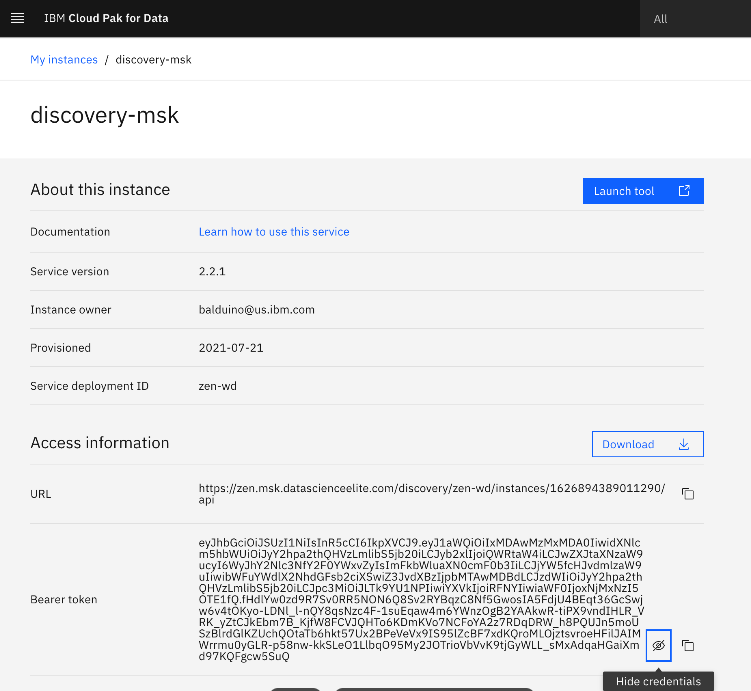

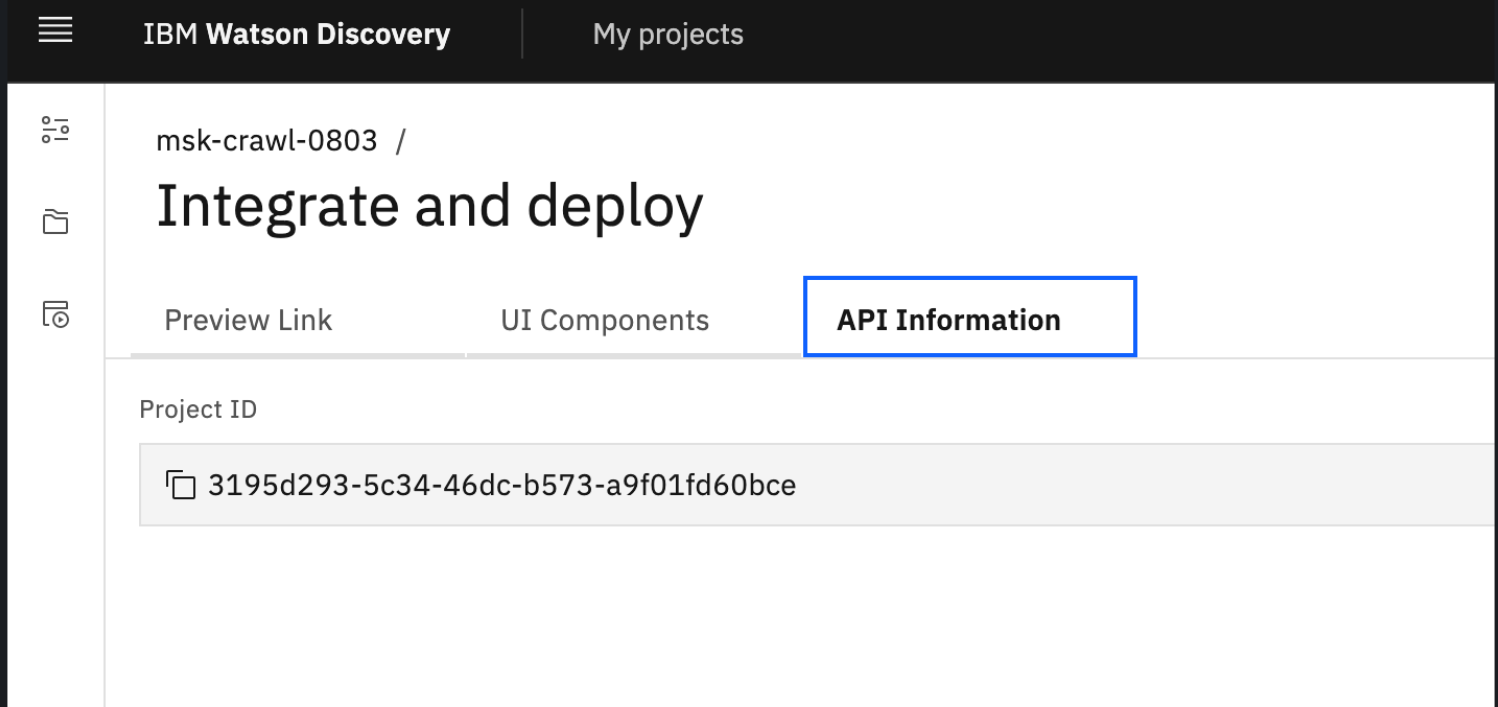

In [2]:
import sys
url = "https://cpd-cpd-cpd.apps.testcp4.mskcc.org/discovery/cpd-wd/instances/1631066302462938/api"
projID = "7914f183-6c42-4eb2-b55b-8ead879a6ebb"
bearerToken = 'eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJ1aWQiOiIxMDAwMzMxMDA3IiwidXNlcm5hbWUiOiJwZXRyb3ZhIiwicm9sZSI6IkFkbWluIiwicGVybWlzc2lvbnMiOlsic2lnbl9pbl9vbmx5IiwiYWNjZXNzX2NhdGFsb2ciLCJhZG1pbmlzdHJhdG9yIiwiY2FuX3Byb3Zpc2lvbiIsIm1hbmFnZV9jYXRhbG9nIiwiYXV0aG9yX2dvdmVybmFuY2VfYXJ0aWZhY3RzIiwibWFuYWdlX2dvdmVybmFuY2Vfd29ya2Zsb3ciLCJ2aWV3X2dvdmVybmFuY2VfYXJ0aWZhY3RzIiwibWFuYWdlX2NhdGVnb3JpZXMiLCJtYW5hZ2VfcXVhbGl0eSIsIm1hbmFnZV9pbmZvcm1hdGlvbl9hc3NldHMiLCJtYW5hZ2VfZGlzY292ZXJ5IiwibWFuYWdlX21ldGFkYXRhX2ltcG9ydCIsInZpZXdfcXVhbGl0eSIsImFjY2Vzc19pbmZvcm1hdGlvbl9hc3NldHMiXSwiZ3JvdXBzIjpbMTAwMDUsMTAwMDBdLCJzdWIiOiJwZXRyb3ZhIiwiaXNzIjoiS05PWFNTTyIsImF1ZCI6IkRTWCIsImlhdCI6MTYzNDE2NDU3Nn0.SLLmEfQcVQv8f10UCZ1P50JKG8afRqsY7e-xnCrMqAic-5mFZlnZmbqP2JTXHS9alce_7ZpbbzLXtBVIv727FnEOy4R0VuwOVD7fhLwHdZt9mwUXUndz5ZsrB3gc15_uxXqn0kwCUjGgtSxxgsxRNKdmCH7PncvNHylBo-3S1ngDX22Y1ZYnDReb_4WTLYHBWxLxpiSq5lhDadlVzEJO95OlqJ7Z6ZZtkKnEhIY1zz0onHfYb3GSM53wwYjjbkTvzvjJoEaUxrFdWnjJoZM6SbRigjlCxmnx0gyrsywvKFqXZjBPdQt_lVUulnSRdPBJFcuZ-wT1pqYDFmJthVHi4A'
from project_lib import Project
project = Project()

if '/project_data/data_asset/' not in sys.path:
    sys.path.insert(0, '/project_data/data_asset/')

### Authenticate Watson Discovery instance

In [3]:
#pip install --upgrade ibm-watson

     |████████████████████████████████| 412 kB 6.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 45 kB 4.3 MB/s eta 0:00:011
     |████████████████████████████████| 68 kB 6.2 MB/s eta 0:00:011
  Created wheel for ibm-watson: filename=ibm_watson-5.3.0-py3-none-any.whl size=408872 sha256=74ffdc4a796577617b89fe580b0454035f54a4251333be03e1d51a04758b4b19
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/21/d9/82/4ce5b94730bc4f1f7b4c6384f72964b9b8f79fcc125bb8085c
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.11.3-py3-none-any.whl size=74744 sha256=7ed57b054f5a0a469928a340f8fcda6cbe28f9899f63db21eed3d67074a840f9
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/93/85/b2/7c2428617824a175293f7957d4a20b4975eb0ddbef52800006
Successfully built ibm-watson ibm-cloud-sdk-core
  Attempting uninstall: PyJWT
    Found existing installation

In [3]:
from ibm_cloud_sdk_core.authenticators import BearerTokenAuthenticator
import json
from ibm_watson import DiscoveryV2

authenticator = BearerTokenAuthenticator(bearerToken)
discovery = DiscoveryV2(version='2019-11-22', authenticator=authenticator)
discovery.set_service_url(url)
discovery.set_disable_ssl_verification(True)
response = discovery.list_collections(  project_id = projID).get_result()
print(json.dumps(response, indent=2))

{
  "collections": [
    {
      "name": "MSKBenefitsCollection0915",
      "collection_id": "31fd7240-8947-3db0-0000-017beb180d0b"
    }
  ]
}


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cpd-cpd-cpd.apps.testcp4.mskcc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


### Pull the crawled data from Watson Discovery collection project

In [4]:
response = discovery.query(
  project_id=projID,collection_ids=["31fd7240-8947-3db0-0000-017beb180d0b"],
  natural_language_query='',
  passages= {"enabled": True, "find_answers":True, "per_document":True},
  count = 545
).get_result()

print(json.dumps(response, indent=2))
project.save_data(file_name = "wd_crawl_raw.json", data = json.dumps(response, indent=2), overwrite=True)


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cpd-cpd-cpd.apps.testcp4.mskcc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'file_name': 'wd_crawl_raw.json',
 'message': 'File saved to project storage.',
 'asset_id': '7185e741-97a0-487a-a40b-051f3e9113e4'}

### Load the saved JSON file

In [5]:
import pandas as pd
import json
import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Reading the json as a dict
with open('/project_data/data_asset/wd_crawl_raw.json') as json_data:
    data = json.load(json_data)

In [6]:
df = pd.DataFrame.from_dict(data['results'],orient='columns')

In [7]:
df.head(3)

document_id                                    result_metadata                                           metadata                                 extracted_metadata  width                                               html                   provider_url  type                      title provider_name version  height                                  document_passages                                               text date retirement_tool_category  menu_order modified_gmt link content  featured_media meta retirement_tool_timeframe guid modified retirement_tool_question excerpt date_gmt slug status  tags post_tag  parent name  count taxonomy numeric_value secondary_title  author comment_status ping_status template description thumbnail_url  thumbnail_height  thumbnail_width questions
0  e559708396325a58ad05c2a016ca0b87f6ca5a235def60...  {'collection_id': '31fd7240-8947-3db0-0000-017...  {'parent_document_id': 'e559708396325a58ad05c2...  {'sha1': 'B1BC5116C4C7BA7DF922624EB568FD723EC3...  600.0  <blockquote class="wp-embedded-content"><a hre...  https://mskbenefits.mskcc.org  rich  2022 medical plan modeler  MSK Benefits     1.0   338.0  [{'passage_text': '2022 medical plan modeler',...                                                NaN  NaN                      NaN         NaN          NaN  NaN     NaN             NaN  NaN                       NaN  NaN      NaN                      NaN     NaN      NaN  NaN    NaN   NaN      NaN     NaN  NaN    NaN      NaN           NaN             NaN     NaN            NaN         NaN      NaN         NaN           NaN               NaN              NaN       NaN
1  b9bf020e3c599c88fcdc4753c84e35a617fafa75107b00...  {'collection_id': '31fd7240-8947-3db0-0000-017...  {'parent_document_id': 'b9bf020e3c599c88fcdc47...  {'sha1': 'F21CDE7D0D8BFD3F9FDBD6E35FE2FCA9B0DE...    NaN                                                NaN                            NaN   NaN                        NaN           NaN     NaN     NaN                                                 []                                                NaN  NaN                      NaN         NaN          NaN  NaN     NaN             NaN  NaN                       NaN  NaN      NaN                      NaN     NaN      NaN  NaN    NaN   NaN      NaN     NaN  NaN    NaN      NaN           NaN             NaN     NaN            NaN         NaN      NaN         NaN           NaN               NaN              NaN       NaN
2  01077ba455d864a9f5d3245f992a3f7e7d2361a283bba2...  {'collection_id': '31fd7240-8947-3db0-0000-017...  {'parent_document_id': '01077ba455d864a9f5d324...  {'sha1': 'D4A5C1EB3285F2BAB8392AE1102F28E21156...    NaN                                                NaN                            NaN   NaN                        NaN           NaN     NaN     NaN  [{'passage_text': 'One of today’s most persona...  One of today’s most personal connections \nAet...  NaN                      NaN         NaN          NaN  NaN     NaN             NaN  NaN                       NaN  NaN      NaN                      NaN     NaN      NaN  NaN    NaN   NaN      NaN     NaN  NaN    NaN      NaN           NaN             NaN     NaN            NaN         NaN      NaN         NaN           NaN               NaN              NaN       NaN

### Clean data and save it

In [16]:
import re

df['text'] = df['text'].astype(str)   

df['text_clean'] = df['text'].map(lambda x: x.replace(r'\n', ''))
df['text_clean'] = df['text_clean'].map(lambda x: x.replace(r'\t', ''))


In [17]:
#project.save_data("msk_benefits_crawled_CLEAN_data.csv", df.to_csv(index=True), overwrite=True)

{'file_name': 'msk_benefits_crawled_CLEAN_data.csv',
 'message': 'File saved to project storage.',
 'asset_id': 'b4606fef-48f1-4f6f-8ef3-d8a26d2da7d7'}

[Back to top](#top)